# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The requirement of the company is:
To Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# To Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the NumPy and Pandas packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50) #To be able to see all the columns present in the dataset
pd.set_option('display.max_rows',250)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset
lead = pd.read_csv('Leads.csv')

In [4]:
lead.head() ## Inspecting the first 5 rows in the data frame

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.shape ## Checking dimensions(rows & columns in the data frame)

(9240, 37)

In [6]:
lead.dtypes ## Checking Data Types of columns

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [7]:
lead.info() ## Checking the non-null values column wise in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
lead.describe() ## Inspeccting some statistical information about numerical columns in the data frame

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
## As we per observations in the info() method, we can see we need to clean data and recursively checking nul/missing values.
## Hence defining Null_Values() function:
def Null_Values():
    print(round(100*(lead.isnull().sum()/len(lead.isnull())),2).sort_values(ascending=False))

In [10]:
Null_Values()

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [11]:
## Seperating Numericals columns and Categorical Columns

def Num_Cat_Sep(dtypes):
    cat_cols = []
    num_cols = []
    dict_1 = dict(lead.dtypes)    
    for i in dict_1:
        if dict_1[i] == 'int64' or dict_1[i] == 'float64':
            num_cols.append(i)
        elif dict_1[i] == 'object':
            cat_cols.append(i)
    return cat_cols,num_cols


In [12]:
Num_Cat_Sep(lead.dtypes) ## Calling Function to seperate Numerical Columns and Categorical Columns

(['Prospect ID',
  'Lead Origin',
  'Lead Source',
  'Do Not Email',
  'Do Not Call',
  'Last Activity',
  'Country',
  'Specialization',
  'How did you hear about X Education',
  'What is your current occupation',
  'What matters most to you in choosing a course',
  'Search',
  'Magazine',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Receive More Updates About Our Courses',
  'Tags',
  'Lead Quality',
  'Update me on Supply Chain Content',
  'Get updates on DM Content',
  'Lead Profile',
  'City',
  'Asymmetrique Activity Index',
  'Asymmetrique Profile Index',
  'I agree to pay the amount through cheque',
  'A free copy of Mastering The Interview',
  'Last Notable Activity'],
 ['Lead Number',
  'Converted',
  'TotalVisits',
  'Total Time Spent on Website',
  'Page Views Per Visit',
  'Asymmetrique Activity Score',
  'Asymmetrique Profile Score'])

In [13]:
cat_cols,num_cols = Num_Cat_Sep(lead.dtypes)  ### Calling Num_Cat_Sep function and storing cat_cos & num_cols

In [14]:
print(len(num_cols))  ## Results after Function Execution
print(num_cols)

7
['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [15]:
print(len(cat_cols)) ## Results after Function Execution
print(cat_cols)

30
['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [16]:

## Checking for value_counts of num_colums
for i in num_cols:
    print(lead[i].value_counts())

608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64
0       2193
60        19
127       18
75        18
74        18
        ... 
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent 

In [17]:

for i in cat_cols:
    print(lead[i].value_counts())

571f5408-66f3-4128-a4a7-7d931345b566    1
73ca7445-6fdd-4ce6-970e-2cdf8fc482b5    1
ed68207b-2528-4cd0-9c4c-af7f23ef95ad    1
8af372bf-60de-4811-aced-cd17054dbb70    1
116549d5-2b2b-441f-9528-5662e2b1e7d8    1
                                       ..
accb2b15-a0dc-461c-995b-3f3f9cc1e0e6    1
498ba67b-4e52-11e6-96be-22000aa8e760    1
efb76154-fbe1-46c2-b75d-69d0b0fa4ff5    1
de9878b0-247e-4881-8039-c5716e005a05    1
6dbcc61e-3d8f-46b8-8c07-71f6b433eee4    1
Name: Prospect ID, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release 

## Inference: We could see some of the columns are having Select as one of category in categorical Column. 
Note: select is like when we are filling online form and the a field in it is not mandatory , page developer can keep dropdown button with default value select. if any user not filled that particular field, the entry is saved as select valie for that feild.

In [18]:
## Extracting Columns which has Select values
for i in cat_cols:
    if lead[i].values.any() == 'Select':
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [19]:
lead = lead.replace('Select',np.nan) ## Replacing the Select values in dataframe with Null values

In [20]:
Null_Values()  ## Caluculating Null values Percentages by calling Null_Values function

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [21]:
# Drop all the columns in which greater than 45% missing values are present
for col in lead.columns:
    if (100*(lead[col].isnull().sum()/len(lead[col].isnull()))) > 45:
        lead.drop(col, 1, inplace=True)

In [22]:
Null_Values()  ## Caluculating Null values Percentages by calling Null_Values function

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

## Handling the Null Values greater than 30 and less than 40 

## Since City column doesn't require for our Analysis . Also imputing 39% won't give results

In [23]:
lead = lead.drop('City',axis=1)  ### Removing City Column from dataframe

In [24]:
lead['Specialization'] = lead['Specialization'].replace(np.nan,list(lead.Specialization.mode())[0]) ## As it is categorical column, replacing with Mode of column

In [25]:
lead.shape

(9240, 29)

## Since Tags column is system generated column and won't be available to sales team when calling

In [26]:
lead = lead.drop('Tags',1)

In [27]:
Null_Values()

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Specialization                                    0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [28]:
lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
Philippines                2
Belgium                    2
China                      2
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Vietnam                    1
Russia                     1
Sri Lanka                  1
Kenya                      1
Tanzania                   1
Malaysia                   1
Liberia       

Note: As Most of the country columns have either Select or India. It is highly skewed column. Hence removing the column.

In [29]:
lead = lead.drop('Country',1) ##Since Country column doesn't require for our Analysis

In [30]:
Null_Values()

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [31]:
## As it is categorical column, replacing with Mode of column
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,list(lead['What matters most to you in choosing a course'].mode())[0])

In [32]:
## As it is categorical column, replacing with Mode of column
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,list(lead['What is your current occupation'].mode())[0])

In [33]:
Null_Values()  ## Caluculating Null values Percentages by calling Null_Values function

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What is your current occupation                  0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Specialization                                   0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [34]:
lead.shape  ## Its always recommed to inspect the shape of dataframe

(9240, 27)

## Handling other percentages of Missing Values

In [35]:
## Removing the rows which have null values as they are very less. Model won't get impacted much 
lead = lead[~lead['TotalVisits'].isna()] 

In [36]:
## Removing the rows which have null values as they are very less. Model won't get impacted much 
lead = lead[~lead['Lead Source'].isna()]

In [37]:
#Checking for Null values again
Null_Values()

Last Notable Activity                            0.0
What is your current occupation                  0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [38]:
lead.shape

(9074, 27)

In [39]:
print(len(lead.index))
print(len(lead.index)/9240)  ## Printing how much rows we have after clean up 

9074
0.982034632034632


## Now the data is with out null values. We can now perform other Steps

In [40]:
## Updating Numerical Columns and Categorical Columns list by calling function
cat_cols,num_cols = Num_Cat_Sep(lead.dtypes)

In [41]:
print(num_cols)

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [42]:
for i in cat_cols:
    print(lead[i].value_counts())

571f5408-66f3-4128-a4a7-7d931345b566    1
69645f76-e023-47d8-8ebc-528e250cbd30    1
ed68207b-2528-4cd0-9c4c-af7f23ef95ad    1
8af372bf-60de-4811-aced-cd17054dbb70    1
116549d5-2b2b-441f-9528-5662e2b1e7d8    1
                                       ..
498ba67b-4e52-11e6-96be-22000aa8e760    1
accb2b15-a0dc-461c-995b-3f3f9cc1e0e6    1
338f2b6c-c930-4a80-a154-32e11b9d0ce3    1
7beb1b93-7c55-4ddc-9176-870b768ca6f9    1
6dbcc61e-3d8f-46b8-8c07-71f6b433eee4    1
Name: Prospect ID, Length: 9074, dtype: int64
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat           

In [43]:
### Checking Single Unique values in each category. 

unique_dict = dict(lead.nunique().sort_values(ascending=True))
one_val_col = []
two_val_col = []
for i in unique_dict:
    if unique_dict[i] == 1:
        one_val_col.append(i)
    elif unique_dict[i] == 2:
        two_val_col.append(i)

In [44]:
one_val_col ## These columns have only single category and won't be require for our model building and analyis

['Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Magazine',
 'Get updates on DM Content',
 'Update me on Supply Chain Content']

In [45]:
two_val_col

['Search',
 'A free copy of Mastering The Interview',
 'Newspaper',
 'Digital Advertisement',
 'X Education Forums',
 'Newspaper Article',
 'Converted',
 'Do Not Call',
 'Do Not Email',
 'Through Recommendations']

In [46]:
### Dropping columns which have only one unique value, as from this, model don't learn anything
lead = lead.drop(one_val_col,axis =1)  

In [47]:
lead.nunique().sort_values(ascending=True)  ## Checking again Unique values in the dataframe

Through Recommendations                             2
Digital Advertisement                               2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Newspaper                                           2
X Education Forums                                  2
Newspaper Article                                   2
A free copy of Mastering The Interview              2
Search                                              2
What matters most to you in choosing a course       3
Lead Origin                                         4
What is your current occupation                     6
Last Notable Activity                              16
Last Activity                                      17
Specialization                                     18
Lead Source                                        21
TotalVisits                                        41
Page Views Per Visit        

In [48]:
## Checking two value category columns and handle them
for i in two_val_col:
    print('Column_Name: ' + i)
    print(100*(lead[i].value_counts(normalize=True)))

Column_Name: Search
No     99.845713
Yes     0.154287
Name: Search, dtype: float64
Column_Name: A free copy of Mastering The Interview
No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64
Column_Name: Newspaper
No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64
Column_Name: Digital Advertisement
No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64
Column_Name: X Education Forums
No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64
Column_Name: Newspaper Article
No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64
Column_Name: Converted
0    62.144589
1    37.855411
Name: Converted, dtype: float64
Column_Name: Do Not Call
No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64
Column_Name: Do Not Email
No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64
Column_Name: Through Recommendations
No     99.922857
Yes     0.077143
Name: Through Re

In [49]:
## Based on above results Removing columns which are highly skewed under two unique columns category
lead = lead.drop(['Search','Newspaper','Digital Advertisement','Through Recommendations','X Education Forums','Do Not Call','Do Not Email','Newspaper Article'],axis=1)

In [50]:
lead.nunique().sort_values(ascending=True)

Converted                                           2
A free copy of Mastering The Interview              2
What matters most to you in choosing a course       3
Lead Origin                                         4
What is your current occupation                     6
Last Notable Activity                              16
Last Activity                                      17
Specialization                                     18
Lead Source                                        21
TotalVisits                                        41
Page Views Per Visit                              114
Total Time Spent on Website                      1717
Prospect ID                                      9074
Lead Number                                      9074
dtype: int64

In [51]:
lead.shape

(9074, 14)

In [52]:
## Updating Numerical Columns and Categorical Columns list by calling function
cat_cols,num_cols = Num_Cat_Sep(lead.dtypes)

In [53]:
for i in cat_cols[1:]:
    print('Column_Name: ' + i)
    print(100*(lead[i].value_counts(normalize=True)))

Column_Name: Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64
Column_Name: Lead Source
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Live Chat             0.022041
Social Media          0.022041
blog                  0.011020
testone               0.011020
youtubechannel        0.011020
WeLearn               0.011020
welearnblog_Home      0.011020
NC_EDM                0.011020
Pay per Click Ads     0.011020
Name: Lead Source, dtype: float64
Column_Name: Last Activity
Email Opened                    37.822350
SMS Sent      

## We could there are some of columns are highly Skewed and also some categories are inbalance.
So Handling them in following ways:
 - Highly Skewed : Removing columns
 - Categories with imbalance: Creating seperate category for those or leaving as it is, lets model decide

### Lead Source Column

In [54]:
100*(lead['Lead Source'].value_counts(normalize=True)) ## Checking less percentage of value_counts and grouping them into single category

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Live Chat             0.022041
Social Media          0.022041
blog                  0.011020
testone               0.011020
youtubechannel        0.011020
WeLearn               0.011020
welearnblog_Home      0.011020
NC_EDM                0.011020
Pay per Click Ads     0.011020
Name: Lead Source, dtype: float64

In [55]:
## Using replace Function for less percentage value counts

lead['Lead Source'] = lead['Lead Source'].replace('Organic Search','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Reference','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Welingak Website','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Referral Sites','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('bing','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('google','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Click2call','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Social Media','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Live Chat','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Press_Release','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('WeLearn','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('welearnblog_Home','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('blog','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('Pay per Click Ads','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('testone','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('youtubechannel','Other Lead Source')
lead['Lead Source'] = lead['Lead Source'].replace('NC_EDM','Other Lead Source')

In [56]:
100*(lead['Lead Source'].value_counts(normalize=True))

Google               31.606789
Direct Traffic       28.025127
Other Lead Source    21.049151
Olark Chat           19.318933
Name: Lead Source, dtype: float64

### Last Activity

In [57]:
100*(lead['Last Activity'].value_counts(normalize=True))  ## Checking less percentage of value_counts and grouping them into single category

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [58]:
## Using replace Function for less percentage value counts

lead['Last Activity']=lead['Last Activity'].replace("Email Link Clicked", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Form Submitted on Website", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Unreachable", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Unsubscribed", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Had a Phone Conversation", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("View in browser link Clicked", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Approached upfront", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Email Marked Spam", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Email Received", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Visited Booth in Tradeshow", 'Other Last Activity')
lead['Last Activity']=lead['Last Activity'].replace("Resubscribed to emails", 'Other Last Activity')

In [59]:
100*(lead['Last Activity'].value_counts(normalize=True)) 

Email Opened               37.822350
SMS Sent                   29.931673
Olark Chat Conversation    10.711924
Page Visited on Website     7.053119
Other Last Activity         6.325766
Converted to Lead           4.716773
Email Bounced               3.438395
Name: Last Activity, dtype: float64

### Specialization

In [60]:
100*(lead['Specialization'].value_counts(normalize=True)) ## Checking less percentage of value_counts and grouping them into single category

Finance Management                   46.737933
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

In [61]:
## Using replace Function for less percentage value counts
lead['Specialization']=lead['Specialization'].replace("International Business", "Other Specialization")
lead['Specialization']=lead['Specialization'].replace("Healthcare Management", "Other Specialization")
lead['Specialization']=lead['Specialization'].replace("Hospitality Management", "Other Specialization")
lead['Specialization']=lead['Specialization'].replace("E-COMMERCE", "Other Specialization")
lead['Specialization']=lead['Specialization'].replace("Retail Management", "Other Specialization")
lead['Specialization']=lead['Specialization'].replace("Rural and Agribusiness", "Other Specialization")
lead['Specialization']=lead['Specialization'].replace("E-Business", "Other Specialization")
lead['Specialization']=lead['Specialization'].replace("Services Excellence", "Other Specialization")

In [62]:
100*(lead['Specialization'].value_counts(normalize=True))

Finance Management                   46.737933
Human Resource Management             9.224157
Other Specialization                  9.080890
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
Name: Specialization, dtype: float64

### Current Occupation

In [63]:
100*(lead['What is your current occupation'].value_counts(normalize=True))  ## ## Checking less percentage of value_counts and grouping them into single category

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

In [64]:
lead = lead.drop(['What is your current occupation'],axis=1) ## Column is highly skewed. Hence dropping the column

### What matters most to you in choosing a course

In [65]:
100*(lead['What matters most to you in choosing a course'].value_counts(normalize=True)) ## Checking less percentage of value_counts and grouping them into single category

Better Career Prospects      99.977959
Flexibility & Convenience     0.011020
Other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64

In [66]:
lead = lead.drop(['What matters most to you in choosing a course'],axis=1) ## Column is highly skewed. Hence dropping the column

### Last Notable Activity

In [67]:
100*(lead['Last Notable Activity'].value_counts(normalize=True)) ## Checking less percentage of value_counts and grouping them into single category

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Approached upfront               0.011020
Name: Last Notable Activity, dtype: float64

In [68]:
## Using replace Function for less percentage value counts
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Page Visited on Website", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Olark Chat Conversation", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Email Link Clicked", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Email Bounced", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Unsubscribed", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Unreachable", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Had a Phone Conversation", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Email Marked Spam", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Approached upfront", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Form Submitted on Website", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Email Received", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("Resubscribed to emails", "Other Activity")
lead['Last Notable Activity']= lead['Last Notable Activity'].replace("View in browser link Clicked", "Other Activity")

In [69]:
100*(lead['Last Notable Activity'].value_counts(normalize=True))

Modified          36.003967
Email Opened      31.110866
SMS Sent          23.716112
Other Activity     9.169054
Name: Last Notable Activity, dtype: float64

In [70]:
## Updating Numerical Columns and Categorical Columns list by calling function
cat_cols,num_cols = Num_Cat_Sep(lead.dtypes)

In [71]:
for i in cat_cols[1:]:
    print('Column_Name: ' + i)
    print(100*(lead[i].value_counts(normalize=True)))

Column_Name: Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64
Column_Name: Lead Source
Google               31.606789
Direct Traffic       28.025127
Other Lead Source    21.049151
Olark Chat           19.318933
Name: Lead Source, dtype: float64
Column_Name: Last Activity
Email Opened               37.822350
SMS Sent                   29.931673
Olark Chat Conversation    10.711924
Page Visited on Website     7.053119
Other Last Activity         6.325766
Converted to Lead           4.716773
Email Bounced               3.438395
Name: Last Activity, dtype: float64
Column_Name: Specialization
Finance Management                   46.737933
Human Resource Management             9.224157
Other Specialization                  9.080890
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration  

In [72]:
lead.shape

(9074, 12)

In [73]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Specialization                            9074 non-null object
A free copy of Mastering The Interview    9074 non-null object
Last Notable Activity                     9074 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 921.6+ KB


Now that data is almost clean and ready for our furthur analysis

## Checking for Outliers

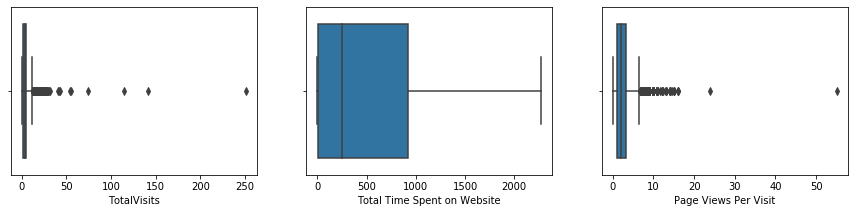

In [74]:
def Outlier_graph():
    plt.figure(figsize = (15,10.5))
    feature = num_cols[2:]
    for i in enumerate(feature):
        plt.subplot(3,3, i[0]+1)
        sns.boxplot(lead[i[1]])
Outlier_graph()   ## Calling Outlier Function

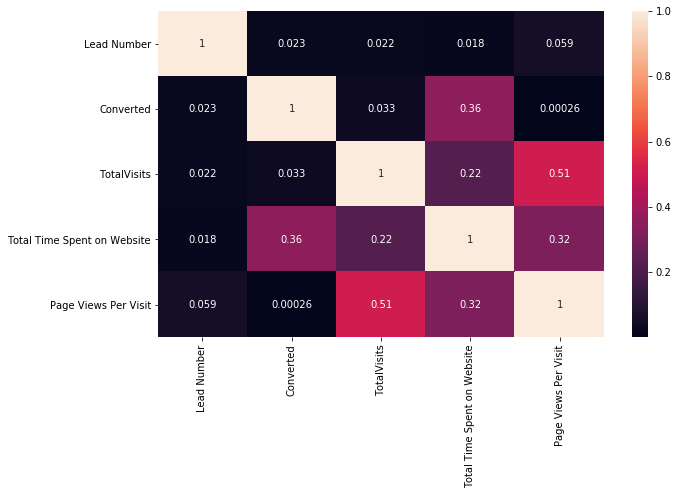

In [75]:
## Correlation Matrix  
plt.figure(figsize=(10,6))
ax = sns.heatmap(lead.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


In [76]:
## Updating Numerical Columns and Categorical Columns list by calling function
cat_cols,num_cols = Num_Cat_Sep(lead.dtypes)

### Outlier Treatment

Note: As we could see there are outliers and considering our business perspectives, Hence lets cap them in modarte range

In [77]:
# Capping Outliers  at moderate range
q3 = lead.TotalVisits.quantile(0.99)
lead = lead[lead.TotalVisits <= q3]

In [78]:
# Capping Outliers
q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= q3]

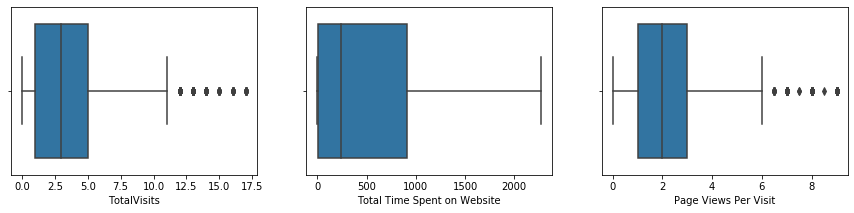

In [79]:
Outlier_graph()

Note: However there are still outliers after soft capping. Lets not decide any thing now. We can do scaling while model building

In [80]:
lead.shape

(8924, 12)

In [81]:
print(len(lead.index))
print(len(lead.index)/9240)

8924
0.9658008658008658


96% of data is still we have for our analysis. Its good enough to proceed futhur

In [82]:
cat_cols,num_cols = Num_Cat_Sep(lead.dtypes) ## Updating cat and num cols

## Univariate Categorical Columns

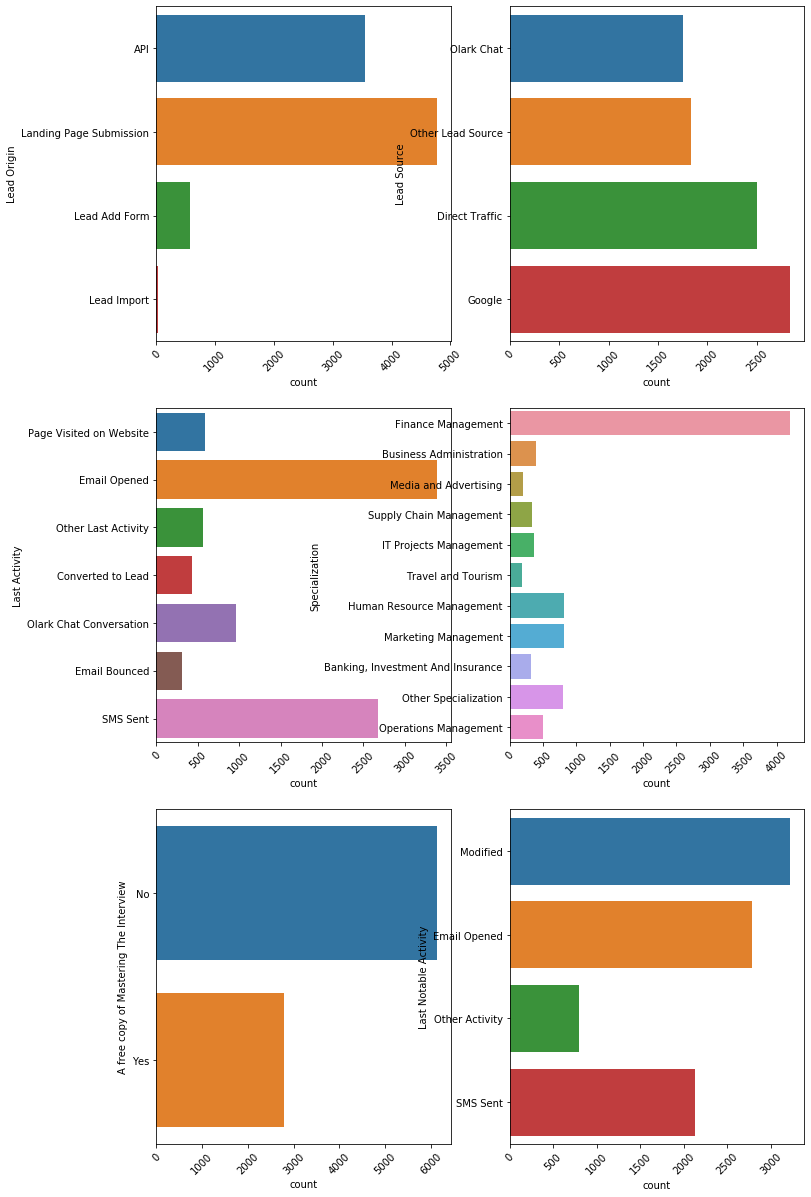

In [83]:
plt.figure(figsize=(10,80))
cols = cat_cols[1:]
for i in range(0,len(cols)):
    plt.subplot(11,2,i+1)
    sns.countplot(y=lead[cols[i]])
    plt.xticks(rotation=45)
plt.subplots_adjust(left=0)

### Inferences from Univariate Analysis

#### Most of the lead's origin are generated from Landing page Submission and API's Variables
#### Most of the lead source are generated from Google and Direct Traffic Variables
#### Most of the Last Activity noticed is Email Opened and SMS Sent
#### Most of the Leads generated are from Finance management Specialiazation
#### Last Noted Activity is Distributed across the Variable with Modified and Email opened being highest


## Bivariate Analysis

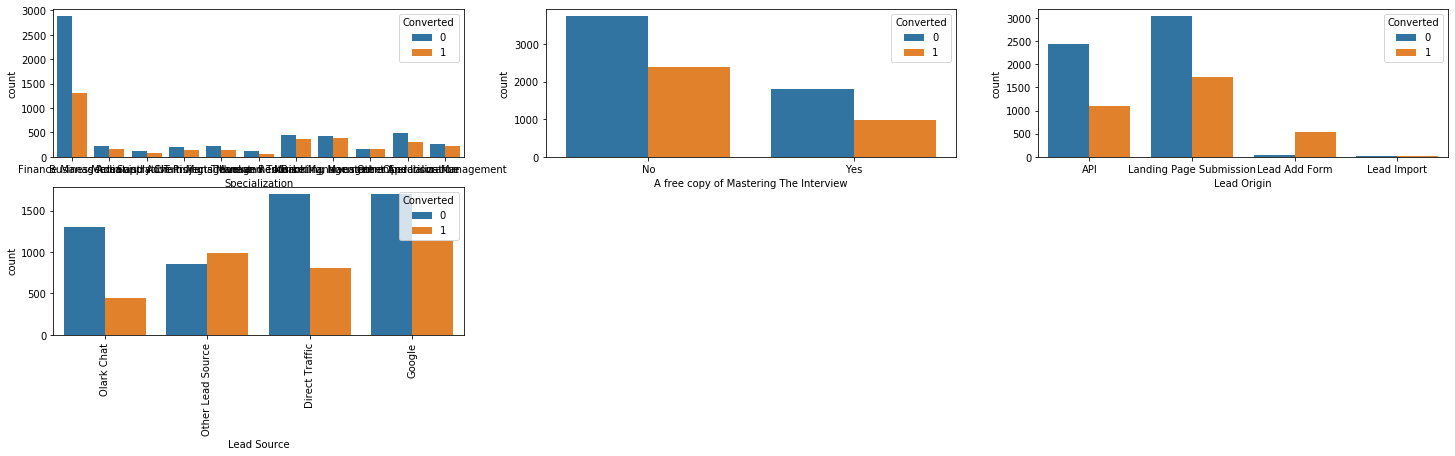

In [84]:
# Analysis on Binary Categorical Variables
plt.figure(figsize=(25,6))
plt.subplot(2,3,1)
sns.countplot(lead['Specialization'],hue = lead.Converted)


plt.subplot(2,3,2)
sns.countplot(lead['A free copy of Mastering The Interview'],hue= lead.Converted)



plt.subplot(2,3,3)
sns.countplot(lead['Lead Origin'],hue = lead.Converted)


plt.subplot(2,3,4)
sns.countplot(lead['Lead Source'],hue = lead.Converted)
plt.xticks(rotation=90)


plt.show()


### Inferences from Bivariae Analysis

#### Most of the leads converted/Not converted are from Finance management Speciliazation
#### Most of the leads generated based Lead Origin, Landing Page Submission are converted/Not converted.
#### Most the leads generated from Google as lead source have more conversion rate

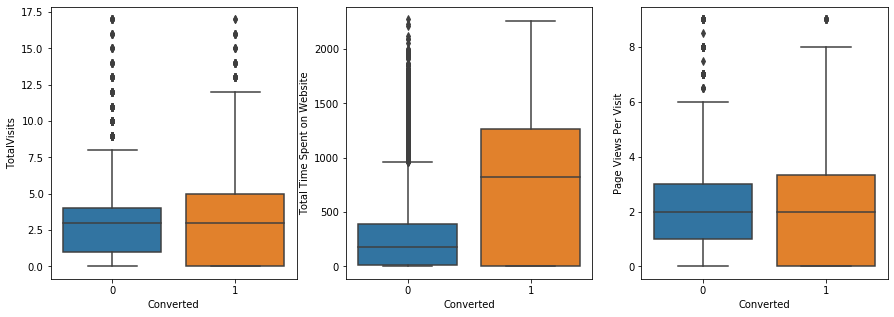

In [85]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data=lead)

plt.subplot(1,3,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data=lead)

plt.subplot(1,3,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data=lead)
plt.show()

### Conclusion from Bivariate Analysis Between Categorical and Continuous Variables
#### Among the Total visits there are more converted Yes's but the median is same as No's
#### Among the leads converted those people has spent more time on the website
#### Among the Page viewers per visit there are more converted Yeses but the median is same as No's

### Converting Binary variables Yes/No to 1 and 0

In [86]:
#Converting Yes/No columns
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [87]:
## Updating Numerical Columns and Categorical Columns list by calling function
cat_cols,num_cols = Num_Cat_Sep(lead.dtypes)

In [88]:
cat_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Last Notable Activity']

## Dummy Variables Creation for some of categorical Columns

In [89]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lodummy = pd.get_dummies(lead['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,lodummy],axis=1)

In [90]:
# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
lsdummy = pd.get_dummies(lead['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,lsdummy],axis=1)

In [91]:
# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
spdummy = pd.get_dummies(lead['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,spdummy],axis=1)

In [92]:
# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
dummyln = pd.get_dummies(lead['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,dummyln],axis=1)

In [93]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Specialization',
                  'Last Notable Activity'], axis = 1)

In [94]:
lead = lead.drop('Last Activity',1)  ## These column is sales generated column. Hence removing for our analysis

In [95]:
lead.head()  ## Inspecting data frame

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other Lead Source,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Modified,Last Notable Activity_Other Activity,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## Checking Correlation Matrix 

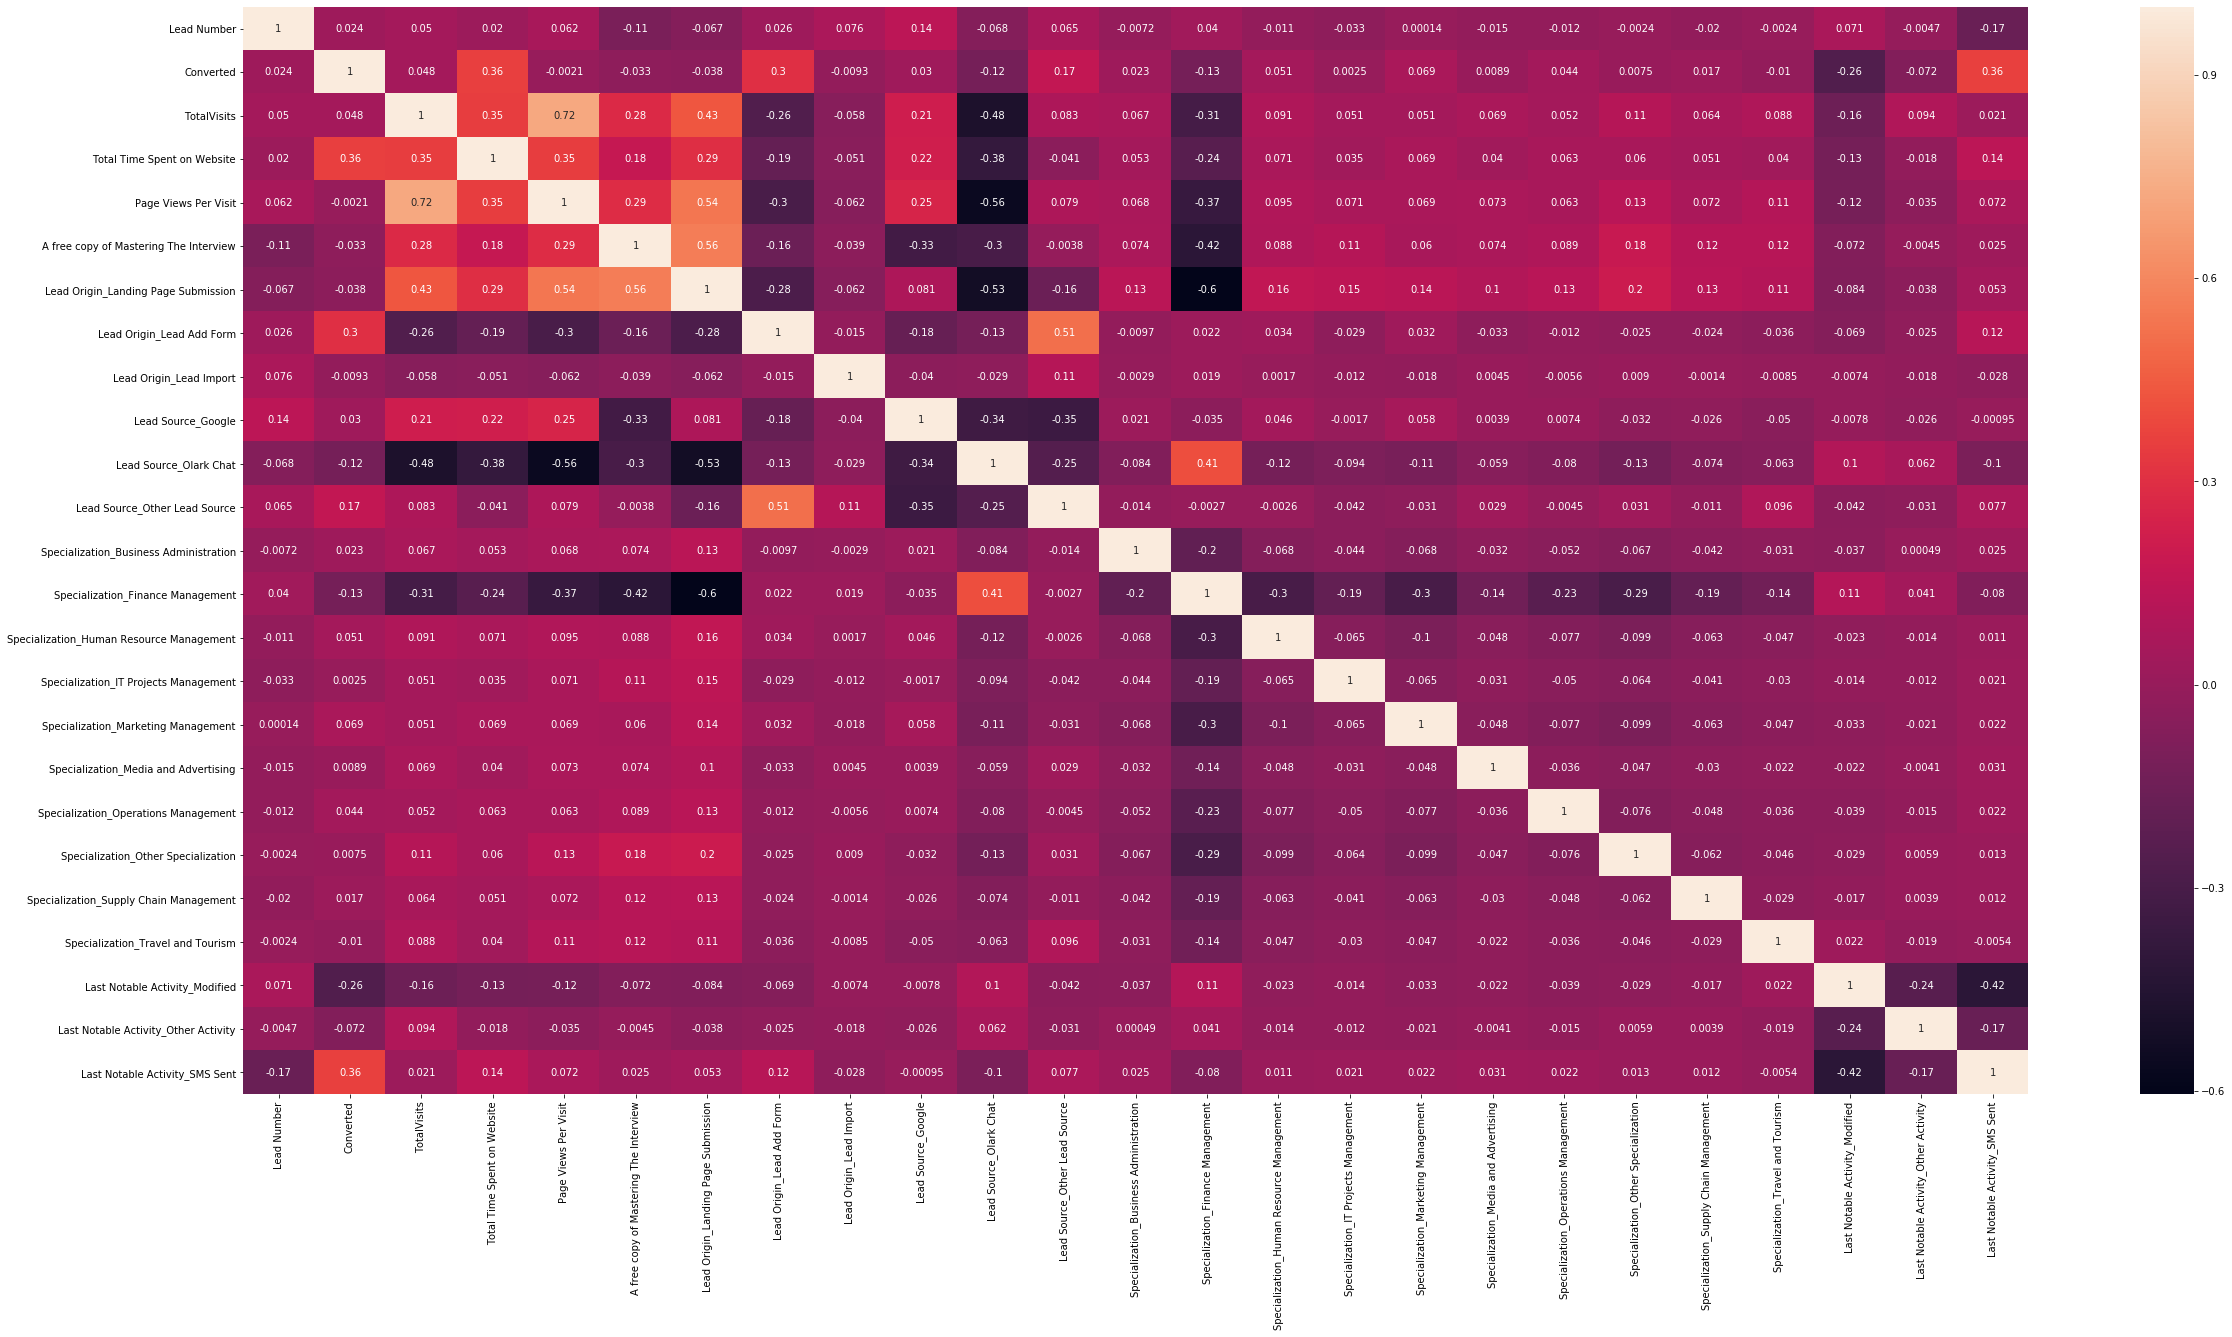

In [96]:
plt.figure(figsize=(40,20))
ax = sns.heatmap(lead.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Build Logestic Regression Model

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Other Lead Source',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Other Specialization',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [99]:
# Putting feature variable to X
X = lead.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other Lead Source,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Modified,Last Notable Activity_Other Activity,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [100]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
X.dtypes

TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
A free copy of Mastering The Interview        int64
Lead Origin_Landing Page Submission           uint8
Lead Origin_Lead Add Form                     uint8
Lead Origin_Lead Import                       uint8
Lead Source_Google                            uint8
Lead Source_Olark Chat                        uint8
Lead Source_Other Lead Source                 uint8
Specialization_Business Administration        uint8
Specialization_Finance Management             uint8
Specialization_Human Resource Management      uint8
Specialization_IT Projects Management         uint8
Specialization_Marketing Management           uint8
Specialization_Media and Advertising          uint8
Specialization_Operations Management          uint8
Specialization_Other Specialization           uint8
Specialization_Supply Chain Management        uint8
Specializati

In [104]:
X.nunique()

TotalVisits                                   18
Total Time Spent on Website                 1705
Page Views Per Visit                          66
A free copy of Mastering The Interview         2
Lead Origin_Landing Page Submission            2
Lead Origin_Lead Add Form                      2
Lead Origin_Lead Import                        2
Lead Source_Google                             2
Lead Source_Olark Chat                         2
Lead Source_Other Lead Source                  2
Specialization_Business Administration         2
Specialization_Finance Management              2
Specialization_Human Resource Management       2
Specialization_IT Projects Management          2
Specialization_Marketing Management            2
Specialization_Media and Advertising           2
Specialization_Operations Management           2
Specialization_Other Specialization            2
Specialization_Supply Chain Management         2
Specialization_Travel and Tourism              2
Last Notable Activit

In [105]:
scaler = MinMaxScaler()  ## Scalar object is created for MinMax Scalar
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'] ## Selecting Num cols for which scaling needs to be implemeted
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) ## Fitting the scalar as well as transform the data
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other Lead Source,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Modified,Last Notable Activity_Other Activity,Last Notable Activity_SMS Sent
6676,0.176471,0.548856,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6138,0.235294,0.359155,0.444444,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8650,0.176471,0.496479,0.333333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3423,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6552,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [106]:
### Checking the Converted Rate
conversation = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversation

37.75212909009413

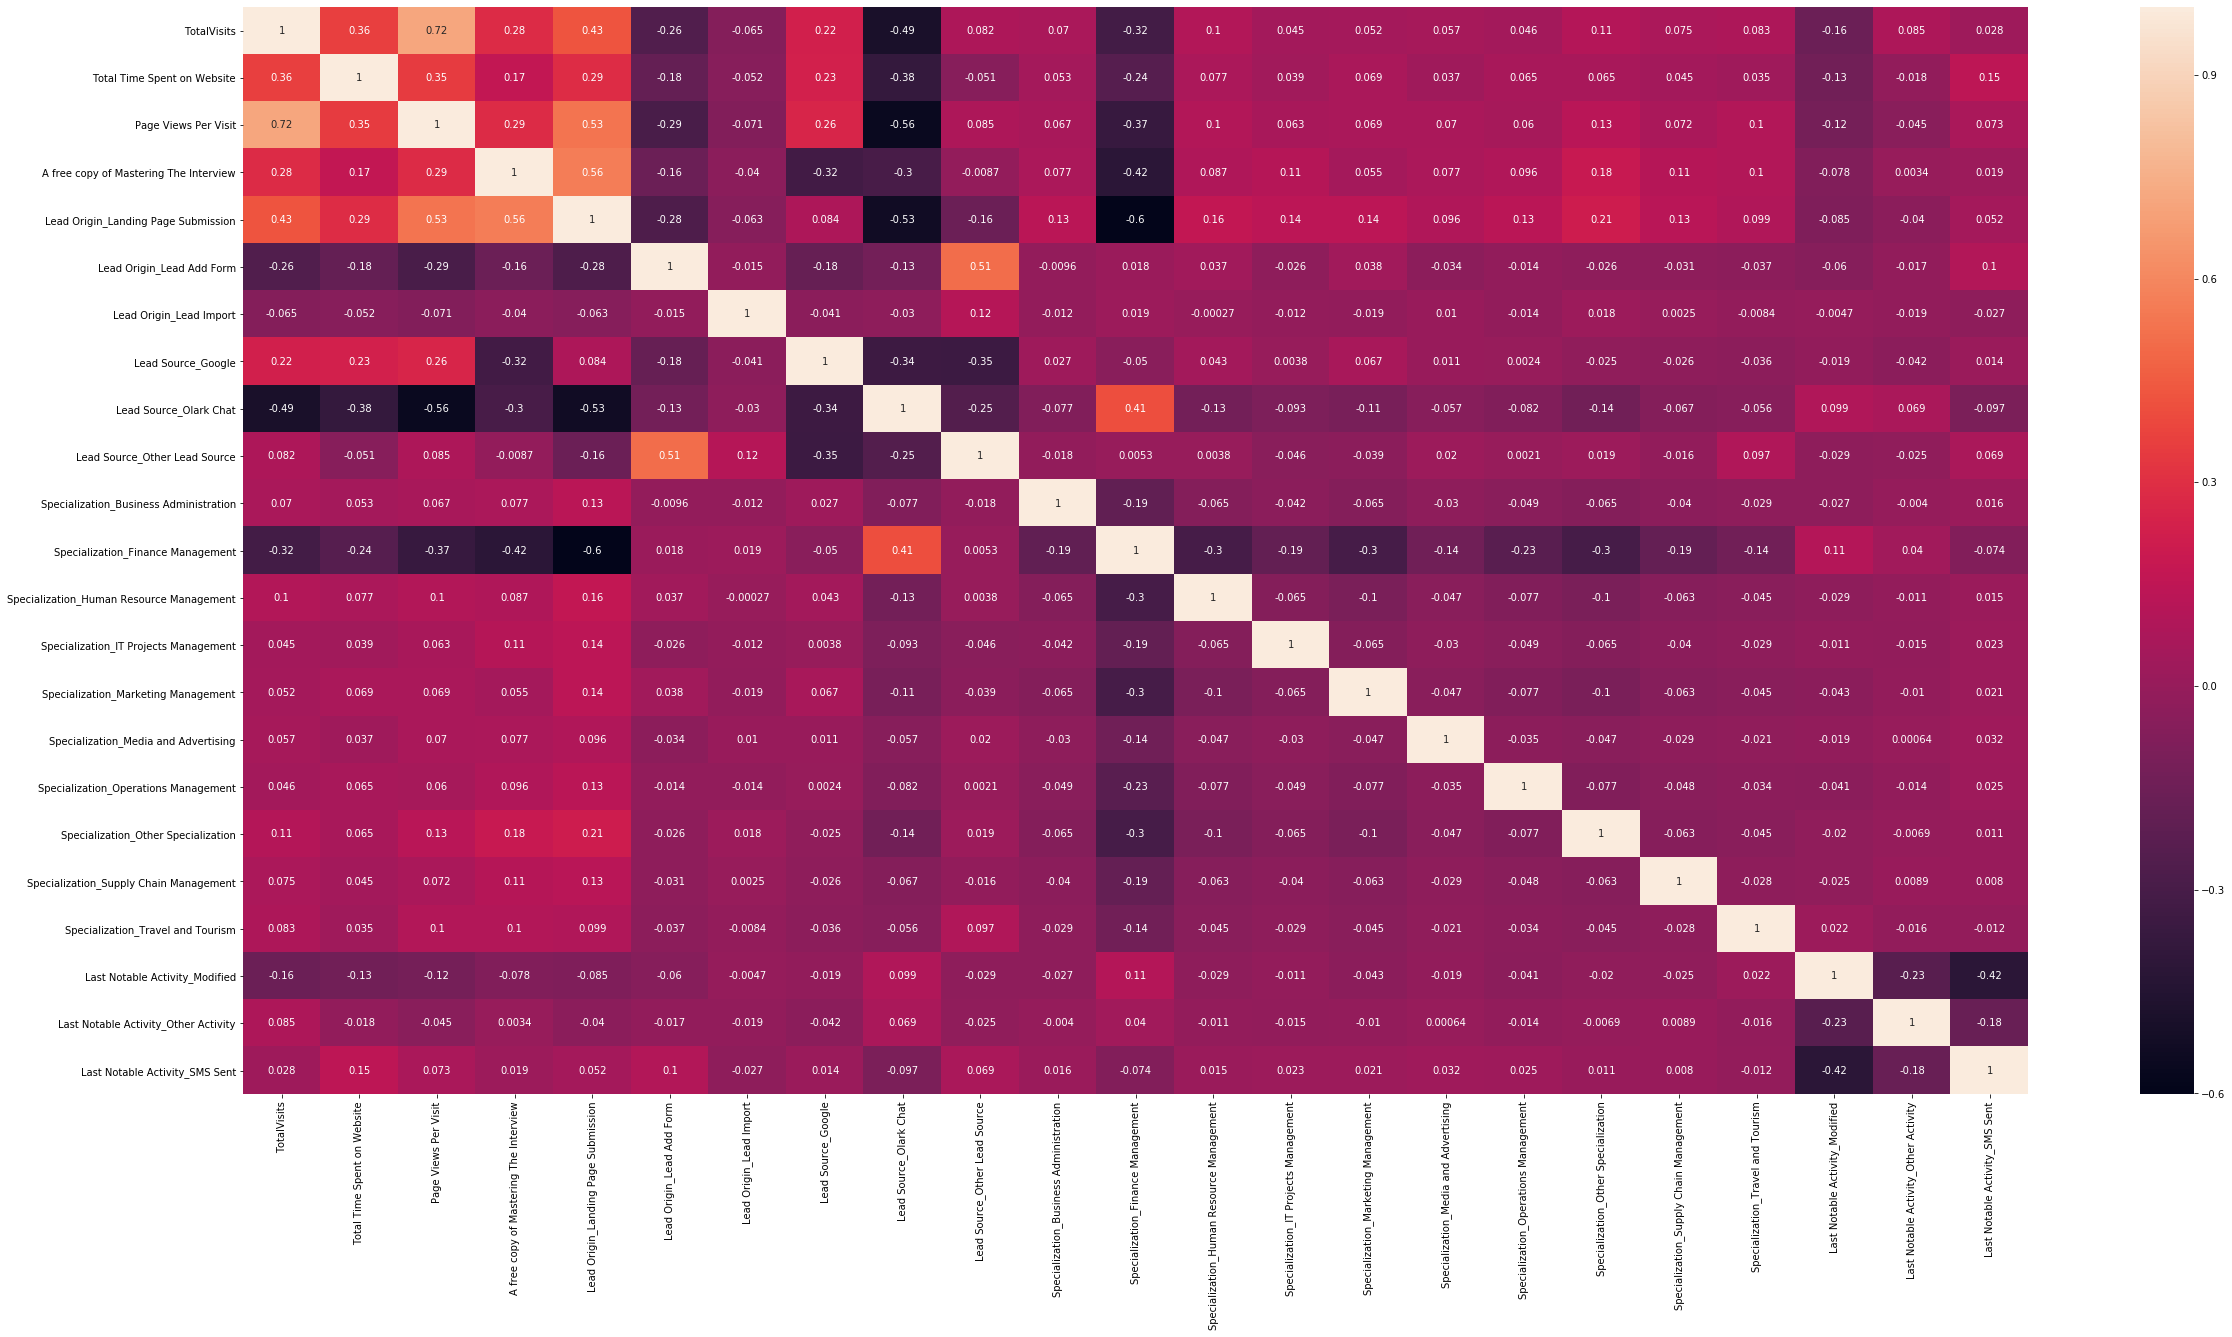

In [107]:
plt.figure(figsize=(40,20))
ax = sns.heatmap(X_train.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Note: There are some negatively correlated values, however they are less values. But model decide which are variables required. Hence as of now we are not removing anuy columns

In [108]:
## Importing Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


Putting all variables and stats model

In [109]:
# Logistic regression model using stats model.
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6222
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.6
Date:                Mon, 26 Oct 2020   Deviance:                       5565.2
Time:                        19:32:29   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6497      0.241     -6.839      0.000      -2.122      -1.177
TotalVisits                                  1.8152      0.288      6.292      0.000       1.250       2.381
Total Time Spent on Website                  4.6247      0.164     28.270      0.000       4.304       4.945
Page Views Per Visit                        -1.2733      0.263     -4.835      0.000      -1.789      -0.757
A free copy of Mastering The Interview      -0.0306      0.105     -0.291      0.771      -0.236       0.175
Lead Origin_Landing Page Submission         -0.3868      0.113     -3.412      0.001      -0.609      -0.165
Lead Origin_Lead Add Form                    4.3459      0.251     17.326      0.000       3.854       4.838
Lead Origin_Lead Import                      1.3940      0.498      2.799      0.005       0.418       2.370
Lead Source_Google                           0.3938      0.112      3.519      0.000       0.174       0.613
Lead Source_Olark Chat                       1.2198      0.155      7.850      0.000       0.915       1.524
Lead Source_Other Lead Source                0.2474      0.127      1.955      0.051      -0.001       0.495
Specialization_Business Administration      -0.2368      0.241     -0.984      0.325      -0.708       0.235
Specialization_Finance Management           -0.8256      0.193     -4.284      0.000      -1.203      -0.448
Specialization_Human Resource Management    -0.0942      0.206     -0.457      0.648      -0.498       0.310
Specialization_IT Projects Management       -0.0160      0.241     -0.067      0.947      -0.488       0.456
Specialization_Marketing Management          0.0471      0.206      0.228      0.819      -0.357       0.451
Specialization_Media and Advertising        -0.1238      0.280     -0.442      0.658      -0.672       0.424
Specialization_Operations Management         0.0393      0.224      0.175      0.861      -0.400       0.479
Specialization_Other Specialization         -0.4361      0.208     -2.098      0.036      -0.843      -0.029
Specialization_Supply Chain Management      -0.2358      0.242     -0.973      0.330      -0.711       0.239
Specialization_Travel and Tourism           -0.4650      0.298     -1.562      0.118      -1.049       0.119
Last Notable Activity_Modified              -0.7553      0.085     -8.904      0.000      -0.922      -0.589
Last Notable Activity_Other Activity        -0.6368      0.131     -4.877      0.000      -0.893      -0.381
Last Notable Activity_SMS Sent               1.4801      0.087     17.027      0.000       1.310       1.651
============================================================================================================
"""

### Feature selection using RFE

In [110]:
logreg = LogisticRegression()

In [111]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True,  True])

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other Lead Source', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 5),
 ('Specialization_IT Projects Management', False, 9),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Media and Advertising', False, 4),
 ('Specialization_Operations Management', False, 7),
 ('Specialization_Other Specialization', True, 1),
 ('Specialization_Supply Chain Management', False, 2),
 ('Specialization_Travel and Tourism', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable A

In [114]:
col = X_train.columns[rfe.support_]

In [115]:
X_train.columns[~rfe.support_]  ## Removed columns as per ranking

Index(['A free copy of Mastering The Interview',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management'],
      dtype='object')

Assesing the model with statsmodels

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.8
Date:                Mon, 26 Oct 2020   Deviance:                       5569.5
Time:                        19:32:29   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.7132      0.159    -10.804      0.000      -2.024      -1.402
TotalVisits                              1.7811      0.286      6.218      0.000       1.220       2.342
Total Time Spent on Website              4.6212      0.163     28.289      0.000       4.301       4.941
Page Views Per Visit                    -1.2642      0.262     -4.818      0.000      -1.778      -0.750
Lead Origin_Landing Page Submission     -0.4010      0.111     -3.628      0.000      -0.618      -0.184
Lead Origin_Lead Add Form                4.3511      0.249     17.459      0.000       3.863       4.840
Lead Origin_Lead Import                  1.3788      0.498      2.769      0.006       0.403       2.355
Lead Source_Google                       0.4147      0.094      4.431      0.000       0.231       0.598
Lead Source_Olark Chat                   1.2250      0.149      8.230      0.000       0.933       1.517
Lead Source_Other Lead Source            0.2503      0.124      2.024      0.043       0.008       0.493
Specialization_Finance Management       -0.7678      0.091     -8.425      0.000      -0.946      -0.589
Specialization_Other Specialization     -0.3785      0.121     -3.118      0.002      -0.616      -0.141
Specialization_Travel and Tourism       -0.4064      0.246     -1.655      0.098      -0.888       0.075
Last Notable Activity_Modified          -0.7543      0.085     -8.905      0.000      -0.920      -0.588
Last Notable Activity_Other Activity    -0.6396      0.131     -4.899      0.000      -0.895      -0.384
Last Notable Activity_SMS Sent           1.4798      0.087     17.047      0.000       1.310       1.650
========================================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.63
0,TotalVisits,4.91
3,Lead Origin_Landing Page Submission,3.47
8,Lead Source_Other Lead Source,2.64
9,Specialization_Finance Management,2.58
1,Total Time Spent on Website,2.19
6,Lead Source_Google,2.17
7,Lead Source_Olark Chat,1.99
12,Last Notable Activity_Modified,1.98
4,Lead Origin_Lead Add Form,1.77


In [118]:
# Dropping the column with high p-value first
col = col.drop('Specialization_Travel and Tourism',1)

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.2
Date:                Mon, 26 Oct 2020   Deviance:                       5572.3
Time:                        19:32:29   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.7172      0.159    -10.830      0.000      -2.028      -1.406
TotalVisits                              1.7759      0.287      6.198      0.000       1.214       2.337
Total Time Spent on Website              4.6166      0.163     28.286      0.000       4.297       4.937
Page Views Per Visit                    -1.2665      0.262     -4.827      0.000      -1.781      -0.752
Lead Origin_Landing Page Submission     -0.4064      0.111     -3.677      0.000      -0.623      -0.190
Lead Origin_Lead Add Form                4.3711      0.249     17.557      0.000       3.883       4.859
Lead Origin_Lead Import                  1.3962      0.498      2.806      0.005       0.421       2.372
Lead Source_Google                       0.4124      0.094      4.409      0.000       0.229       0.596
Lead Source_Olark Chat                   1.2132      0.149      8.163      0.000       0.922       1.504
Lead Source_Other Lead Source            0.2239      0.123      1.827      0.068      -0.016       0.464
Specialization_Finance Management       -0.7503      0.091     -8.288      0.000      -0.928      -0.573
Specialization_Other Specialization     -0.3588      0.121     -2.970      0.003      -0.596      -0.122
Last Notable Activity_Modified          -0.7582      0.085     -8.957      0.000      -0.924      -0.592
Last Notable Activity_Other Activity    -0.6392      0.131     -4.897      0.000      -0.895      -0.383
Last Notable Activity_SMS Sent           1.4799      0.087     17.054      0.000       1.310       1.650
========================================================================================================
"""

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.62
0,TotalVisits,4.91
3,Lead Origin_Landing Page Submission,3.45
8,Lead Source_Other Lead Source,2.59
9,Specialization_Finance Management,2.54
1,Total Time Spent on Website,2.19
6,Lead Source_Google,2.17
7,Lead Source_Olark Chat,1.98
11,Last Notable Activity_Modified,1.97
4,Lead Origin_Lead Add Form,1.77


In [121]:
col = col.drop('Page Views Per Visit',1)

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.0
Date:                Mon, 26 Oct 2020   Deviance:                       5596.0
Time:                        19:32:30   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.8718      0.155    -12.054      0.000      -2.176      -1.567
TotalVisits                              1.1392      0.253      4.494      0.000       0.642       1.636
Total Time Spent on Website              4.6125      0.163     28.304      0.000       4.293       4.932
Lead Origin_Landing Page Submission     -0.5063      0.108     -4.691      0.000      -0.718      -0.295
Lead Origin_Lead Add Form                4.6318      0.243     19.027      0.000       4.155       5.109
Lead Origin_Lead Import                  1.6687      0.494      3.377      0.001       0.700       2.637
Lead Source_Google                       0.3493      0.092      3.785      0.000       0.168       0.530
Lead Source_Olark Chat                   1.3330      0.147      9.098      0.000       1.046       1.620
Lead Source_Other Lead Source            0.0909      0.119      0.764      0.445      -0.142       0.324
Specialization_Finance Management       -0.7297      0.090     -8.095      0.000      -0.906      -0.553
Specialization_Other Specialization     -0.3588      0.121     -2.977      0.003      -0.595      -0.123
Last Notable Activity_Modified          -0.7432      0.084     -8.804      0.000      -0.909      -0.578
Last Notable Activity_Other Activity    -0.5723      0.129     -4.438      0.000      -0.825      -0.320
Last Notable Activity_SMS Sent           1.4613      0.086     16.912      0.000       1.292       1.631
========================================================================================================
"""

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.48
2,Lead Origin_Landing Page Submission,2.84
8,Specialization_Finance Management,2.53
7,Lead Source_Other Lead Source,2.37
1,Total Time Spent on Website,2.18
5,Lead Source_Google,2.04
6,Lead Source_Olark Chat,1.97
10,Last Notable Activity_Modified,1.97
12,Last Notable Activity_SMS Sent,1.71
3,Lead Origin_Lead Add Form,1.68


In [124]:
col = col.drop('Lead Source_Other Lead Source',1) ## High P values

In [125]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.3
Date:                Mon, 26 Oct 2020   Deviance:                       5596.6
Time:                        19:32:30   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.8332      0.147    -12.495      0.000      -2.121      -1.546
TotalVisits                              1.1850      0.246      4.812      0.000       0.702       1.668
Total Time Spent on Website              4.6090      0.163     28.296      0.000       4.290       4.928
Lead Origin_Landing Page Submission     -0.5304      0.103     -5.137      0.000      -0.733      -0.328
Lead Origin_Lead Add Form                4.6819      0.235     19.955      0.000       4.222       5.142
Lead Origin_Lead Import                  1.7190      0.490      3.510      0.000       0.759       2.679
Lead Source_Google                       0.3135      0.079      3.946      0.000       0.158       0.469
Lead Source_Olark Chat                   1.2915      0.136      9.500      0.000       1.025       1.558
Specialization_Finance Management       -0.7280      0.090     -8.081      0.000      -0.905      -0.551
Specialization_Other Specialization     -0.3564      0.120     -2.959      0.003      -0.592      -0.120
Last Notable Activity_Modified          -0.7412      0.084     -8.784      0.000      -0.907      -0.576
Last Notable Activity_Other Activity    -0.5765      0.129     -4.474      0.000      -0.829      -0.324
Last Notable Activity_SMS Sent           1.4631      0.086     16.942      0.000       1.294       1.632
========================================================================================================
"""

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.97
2,Lead Origin_Landing Page Submission,2.80
7,Specialization_Finance Management,2.41
1,Total Time Spent on Website,2.18
9,Last Notable Activity_Modified,1.92
6,Lead Source_Olark Chat,1.86
11,Last Notable Activity_SMS Sent,1.69
5,Lead Source_Google,1.68
10,Last Notable Activity_Other Activity,1.28
8,Specialization_Other Specialization,1.19


In [127]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.592710
6138    0.650020
8650    0.533394
3423    0.118064
6552    0.219309
1696    0.249360
2110    0.394117
6830    0.051544
2581    0.171193
5927    0.168735
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5927096 , 0.65001978, 0.53339387, 0.1180637 , 0.219309  ,
       0.24935967, 0.39411669, 0.05154401, 0.17119343, 0.16873455])

##### Creating a dataframe with the actual convert flag and the predicted probabilities

In [129]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = lead['Prospect ID']
y_train_pred_final.head()

,Converted,converted_prob,Prospect ID
0,1,0.592710,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,1,0.650020,2a272436-5132-4136-86fa-dcc88c88f482
2,1,0.533394,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0,0.118064,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,0,0.219309,3256f628-e534-4826-9d63-4a8b88782852


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [130]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,converted_prob,Prospect ID,predicted
0,1,0.592710,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1
1,1,0.650020,2a272436-5132-4136-86fa-dcc88c88f482,1
2,1,0.533394,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1
3,0,0.118064,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0
4,0,0.219309,3256f628-e534-4826-9d63-4a8b88782852,0


In [131]:
#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3377  494]
 [ 744 1631]]


In [132]:
# Predicted     not_con    converted
# Actual
# not_con       3377            494
# converted      744        1631

In [133]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8017931476144733


## Metrics beyond simply accuracy

In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6867368421052632

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.8723843967966933

In [137]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.12761560320330664


In [138]:
# positive predictive value 
print (TP / float(TP+FP))

0.7675294117647059


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8194612958019898


## Plotting the ROC Curve

#### Optimal Cutoff 

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.converted_prob, drop_intermediate=False)

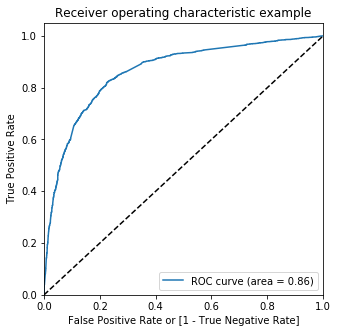

In [142]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.converted_prob)

## Finding optimal cutoff point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [143]:
# Let's create columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.converted_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.592710,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
1,1,0.650020,2a272436-5132-4136-86fa-dcc88c88f482,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,1,0.533394,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
3,0,0.118064,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.219309,3256f628-e534-4826-9d63-4a8b88782852,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num =  [0.0,0.1,0.2,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.380243  1.000000  0.000000
0.10  0.10  0.520173  0.970526  0.243865
0.20  0.20  0.731028  0.902737  0.625678
0.30  0.30  0.788184  0.827368  0.764144
0.31  0.31  0.791066  0.823158  0.771377
0.32  0.32  0.792187  0.818947  0.775769
0.33  0.33  0.790266  0.807579  0.779644
0.34  0.34  0.792027  0.802526  0.785585
0.35  0.35  0.793788  0.796632  0.792043
0.36  0.36  0.795069  0.790316  0.797985
0.37  0.37  0.794428  0.778947  0.803927
0.38  0.38  0.794589  0.769684  0.809868
0.39  0.39  0.795869  0.762947  0.816068
0.40  0.40  0.797791  0.757474  0.822526
0.50  0.50  0.801793  0.686737  0.872384
0.60  0.60  0.785783  0.564211  0.921726
0.70  0.70  0.768332  0.474947  0.948334
0.80  0.80  0.734710  0.352842  0.969000
0.90  0.90  0.686840  0.197895  0.986825


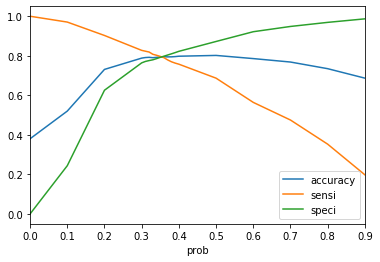

In [145]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [146]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.592710,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.650020,2a272436-5132-4136-86fa-dcc88c88f482,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.533394,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.118064,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.219309,3256f628-e534-4826-9d63-4a8b88782852,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
# Now let us calculate the lead score

y_train_pred_final['Lead Score'] = y_train_pred_final.converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.592710,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,59
1,1,0.650020,2a272436-5132-4136-86fa-dcc88c88f482,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,65
2,1,0.533394,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,53
3,0,0.118064,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
4,0,0.219309,3256f628-e534-4826-9d63-4a8b88782852,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
5,1,0.249360,2058ef08-2858-443e-a01f-a9237db2f5ce,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25
6,1,0.394117,9fae7df4-169d-489b-afe4-0f3d752542ed,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,39
7,0,0.051544,20ef72a2-fb3b-45e0-924e-551c5fa59095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
8,0,0.171193,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
9,0,0.168735,af465dfc-7204-4130-9e05-33231863c4b5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17


In [148]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1906
0     469
Name: final_predicted, dtype: int64

In [149]:
# check the precentage of final_predicted conversions

round(100*(1906/(1906+469)),2)

80.25

In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7920268972142172

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3041,  830],
       [ 469, 1906]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.8025263157894736

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.785585120123999

In [155]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.21441487987600102


In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6966374269005848


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8663817663817663


## Making prediction on Test set

In [158]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [159]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Specialization_Finance Management,Specialization_Other Specialization,Last Notable Activity_Modified,Last Notable Activity_Other Activity,Last Notable Activity_SMS Sent
7625,0.117647,0.713468,1,0,0,0,0,0,0,0,0,0
5207,0.235294,0.390405,1,0,0,0,0,0,0,0,0,0
2390,0.000000,0.000000,0,1,0,0,0,1,0,0,0,1
4362,0.117647,0.102113,1,0,0,1,0,0,0,0,0,1
1023,0.882353,0.139525,1,0,0,0,0,1,0,0,0,0


In [160]:
X_test_sm = sm.add_constant(X_test)

In [161]:
y_test_pred = res.predict(X_test_sm)

In [162]:
y_test_pred[:10]

7625    0.743486
5207    0.429128
2390    0.972978
4362    0.505756
1023    0.197349
8226    0.786221
3079    0.152475
530     0.117235
7873    0.118064
5146    0.820203
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.head()

,0
7625,0.743486
5207,0.429128
2390,0.972978
4362,0.505756
1023,0.197349


In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
#putting lead number to index
y_test_df['Prospect ID'] = lead['Prospect ID']

In [166]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2ddcc5bf-9d4c-48dd-aaa7-93d888eacaec,0.743486
1,1,f42bb2e9-8623-4ab8-97bb-209d7f21918f,0.429128
2,1,458e5150-0c8d-45bb-bea0-4e45bb4d46cc,0.972978
3,0,4ba672b7-7837-4a1d-8658-5a13cf0b5da9,0.505756
4,0,33bfc01d-6467-4336-b2b9-943faa30b866,0.197349


In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_prob'})

In [170]:
# Rearranging the columns
y_pred_final.head()

,Converted,Prospect ID,converted_prob
0,0,2ddcc5bf-9d4c-48dd-aaa7-93d888eacaec,0.743486
1,1,f42bb2e9-8623-4ab8-97bb-209d7f21918f,0.429128
2,1,458e5150-0c8d-45bb-bea0-4e45bb4d46cc,0.972978
3,0,4ba672b7-7837-4a1d-8658-5a13cf0b5da9,0.505756
4,0,33bfc01d-6467-4336-b2b9-943faa30b866,0.197349


In [171]:
y_pred_final['final_predicted'] = y_pred_final.converted_prob.map(lambda x: 1 if x > 0.32 else 0)

In [172]:
y_pred_final.head()

,Converted,Prospect ID,converted_prob,final_predicted
0,0,2ddcc5bf-9d4c-48dd-aaa7-93d888eacaec,0.743486,1
1,1,f42bb2e9-8623-4ab8-97bb-209d7f21918f,0.429128,1
2,1,458e5150-0c8d-45bb-bea0-4e45bb4d46cc,0.972978,1
3,0,4ba672b7-7837-4a1d-8658-5a13cf0b5da9,0.505756,1
4,0,33bfc01d-6467-4336-b2b9-943faa30b866,0.197349,0


In [173]:
# Now let us calculate the lead score

y_pred_final['Lead Score'] = y_pred_final.converted_prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,Prospect ID,converted_prob,final_predicted,Lead Score
0,0,2ddcc5bf-9d4c-48dd-aaa7-93d888eacaec,0.743486,1,74
1,1,f42bb2e9-8623-4ab8-97bb-209d7f21918f,0.429128,1,43
2,1,458e5150-0c8d-45bb-bea0-4e45bb4d46cc,0.972978,1,97
3,0,4ba672b7-7837-4a1d-8658-5a13cf0b5da9,0.505756,1,51
4,0,33bfc01d-6467-4336-b2b9-943faa30b866,0.197349,0,20
5,1,ae564441-f4e2-45f4-961e-eab6f8446a8c,0.786221,1,79
6,0,c2e4f1cd-4a23-42ad-b4f4-88f0c1c1c33f,0.152475,0,15
7,0,3ae07743-278b-42bf-a07c-65b53a57a493,0.117235,0,12
8,0,66f98677-2ae6-4b98-8ed7-c6341af54ecb,0.118064,0,12
9,1,dfec25b3-c814-4cac-9112-110d8a13c776,0.820203,1,82


In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7793129200896192

In [175]:
round(100*(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)),0)

78.0

In [176]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1279,  405],
       [ 186,  808]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8128772635814889

In [179]:
# specivity of our logistic regression model
TN / float(TN+FP)

0.7595011876484561

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [180]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3377,  494],
       [ 744, 1631]], dtype=int64)

##### Precision
TP / TP + FP

In [181]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7675294117647059

##### Recall
TP / TP + FN

In [182]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6867368421052632

### Precision and recall tradeoff

In [183]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.converted_prob)

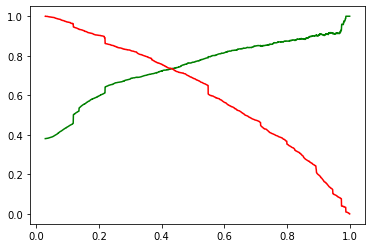

In [184]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [185]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.592710,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,59
1,1,0.650020,2a272436-5132-4136-86fa-dcc88c88f482,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,65
2,1,0.533394,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,53
3,0,0.118064,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
4,0,0.219309,3256f628-e534-4826-9d63-4a8b88782852,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22


In [186]:

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.797470381043868

In [187]:
round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),0)

80.0

In [188]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3253,  618],
       [ 647, 1728]], dtype=int64)

In [189]:
# Calculate Precision

TP/(TP+FP)

0.6661170651277823

In [190]:
# Calculate Recall

TP/(TP+FN)

0.8128772635814889

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [191]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [192]:
y_test_pred[:10]

7625    0.743486
5207    0.429128
2390    0.972978
4362    0.505756
1023    0.197349
8226    0.786221
3079    0.152475
530     0.117235
7873    0.118064
5146    0.820203
dtype: float64

In [193]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [194]:
# Let's see the head

y_pred_1.head()

,0
7625,0.743486
5207,0.429128
2390,0.972978
4362,0.505756
1023,0.197349


In [195]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [196]:
# Putting CustID to index
y_test_df['Prospect ID'] = lead['Prospect ID']

In [197]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [198]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [199]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2ddcc5bf-9d4c-48dd-aaa7-93d888eacaec,0.743486
1,1,f42bb2e9-8623-4ab8-97bb-209d7f21918f,0.429128
2,1,458e5150-0c8d-45bb-bea0-4e45bb4d46cc,0.972978
3,0,4ba672b7-7837-4a1d-8658-5a13cf0b5da9,0.505756
4,0,33bfc01d-6467-4336-b2b9-943faa30b866,0.197349


In [200]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [201]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [202]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.46 else 0)

In [203]:
# Check y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted
0,2ddcc5bf-9d4c-48dd-aaa7-93d888eacaec,0,0.743486,1
1,f42bb2e9-8623-4ab8-97bb-209d7f21918f,1,0.429128,0
2,458e5150-0c8d-45bb-bea0-4e45bb4d46cc,1,0.972978,1
3,4ba672b7-7837-4a1d-8658-5a13cf0b5da9,0,0.505756,1
4,33bfc01d-6467-4336-b2b9-943faa30b866,0,0.197349,0


In [204]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.777445855115758

In [205]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1414,  270],
       [ 326,  668]], dtype=int64)

In [206]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6720321931589537

In [208]:
# Let us calculate specificity
TN / float(TN+FP)

0.8396674584323041

In [209]:
# Calculate Precision

TP/(TP+FP)

0.7121535181236673

In [210]:
# Calculate Recall

TP/(TP+FN)

0.6720321931589537